<a href="https://colab.research.google.com/github/megashree999/Packet_sniffer_megs/blob/main/megsjk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (volab-free version)
!pip install yfinance pandas numpy matplotlib seaborn plotly scikit-learn ta pandas-ta plotly-express

print("All packages installed successfully!")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 14.8 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c60ef158b0b4bbed18370d805529dd04ea9a7317ed9b9579741594b206ddc3dc
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta
  Attempting uninstall: numpy
    Found existing inst

All packages installed successfully!


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas_ta as ta
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
class StockAnalyzer:
    """Custom stock analyzer for comprehensive analysis"""

    def __init__(self, data):
        self.data = data

    def describe(self):
        """Basic statistics"""
        return self.data.describe()

    def correlation(self, method='pearson'):
        """Calculate correlation matrix"""
        numeric_data = self.data.select_dtypes(include=[np.number])
        return numeric_data.corr(method=method)

    def calculate_risk_metrics(self, prices, returns):
        """Calculate comprehensive risk metrics"""
        if len(returns) == 0:
            return {}

        metrics = {
            'total_return': (prices.iloc[-1] / prices.iloc[0] - 1) * 100,
            'annual_return': returns.mean() * 252 * 100,
            'annual_volatility': returns.std() * np.sqrt(252) * 100,
            'sharpe_ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252)) if returns.std() > 0 else 0,
            'max_drawdown': self.calculate_max_drawdown(prices),
            'var_95': returns.quantile(0.05) * 100,
            'cvar_95': returns[returns <= returns.quantile(0.05)].mean() * 100
        }
        return metrics

    @staticmethod
    def calculate_max_drawdown(prices):
        """Calculate maximum drawdown"""
        cumulative = prices / prices.cummax()
        return (1 - cumulative.min()) * 100

print("Custom StockAnalyzer class created successfully!")

Custom StockAnalyzer class created successfully!


In [ ]:
# Define stocks to analyze
stocks = {
    'AAPL': 'Apple Inc.',
    'GOOGL': 'Alphabet Inc.',
    'MSFT': 'Microsoft',
    'AMZN': 'Amazon',
    'TSLA': 'Tesla',
    'META': 'Meta Platforms',
    'NVDA': 'NVIDIA'
}

# Set date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365*2)  # 2 years of data

print(f"Analyzing {len(stocks)} stocks from {start_date.date()} to {end_date.date()}")

Analyzing 7 stocks from 2023-10-11 to 2025-10-10


In [ ]:
def fetch_stock_data(symbol, start_date, end_date):
    """Fetch historical stock data"""
    try:
        stock = yf.download(symbol, start=start_date, end=end_date, progress=False)
        if stock.empty:
            print(f"✗ No data found for {symbol}")
            return None
        stock['Symbol'] = symbol
        print(f"✓ {symbol}: {len(stock)} records")
        return stock
    except Exception as e:
        print(f"✗ Error fetching {symbol}: {e}")
        return None

# Fetch data for all stocks
print("Fetching stock data...")
stock_data = {}
for symbol in stocks.keys():
    data = fetch_stock_data(symbol, start_date, end_date)
    if data is not None:
        stock_data[symbol] = data

print(f"\n✅ Successfully fetched data for {len(stock_data)} stocks")

Fetching stock data...
✓ AAPL: 502 records
✓ GOOGL: 502 records
✓ MSFT: 502 records
✓ AMZN: 502 records
✓ TSLA: 502 records
✓ META: 502 records
✓ NVDA: 502 records

✅ Successfully fetched data for 7 stocks


In [ ]:
def preprocess_data(stock_df):
    """Clean and prepare stock data"""
    # Handle missing values
    stock_df = stock_df.fillna(method='ffill')

    # Calculate basic metrics
    stock_df['Daily_Return'] = stock_df['Close'].pct_change()
    stock_df['Price_Change'] = stock_df['Close'].diff()

    # Calculate moving averages
    stock_df['MA_20'] = stock_df['Close'].rolling(window=20).mean()
    stock_df['MA_50'] = stock_df['Close'].rolling(window=50).mean()

    # Calculate volatility
    stock_df['Volatility_20'] = stock_df['Daily_Return'].rolling(window=20).std()

    return stock_df

print("Preprocessing data...")
for symbol, data in stock_data.items():
    stock_data[symbol] = preprocess_data(data)

print("✅ Data preprocessing completed!")

Preprocessing data...
✅ Data preprocessing completed!


In [ ]:
def calculate_simple_technical_indicators(stock_df):
    """Calculate basic technical indicators without complex dependencies"""

    df = stock_df.copy()

    # 1. Moving Averages (already calculated in preprocessing)
    # They should already be there from Cell 6

    # 2. RSI - Simple calculation
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    # Handle division by zero
    rs = avg_gain / avg_loss.replace(0, np.nan)
    df['RSI'] = 100 - (100 / (1 + rs))

    # 3. Bollinger Bands - Simple and safe
    df['BB_Middle'] = df['Close'].rolling(window=20).mean()
    bb_std = df['Close'].rolling(window=20).std()

    # Convert to Series if it's a DataFrame
    if hasattr(bb_std, 'iloc'):
        bb_std = bb_std.iloc[:, 0] if isinstance(bb_std, pd.DataFrame) else bb_std

    df['BB_Upper'] = df['BB_Middle'] + (bb_std * 2)
    df['BB_Lower'] = df['BB_Middle'] - (bb_std * 2)

    # 4. Price position relative to moving averages
    df['Price_vs_MA20'] = (df['Close'] / df['MA_20'] - 1) * 100
    df['Price_vs_MA50'] = (df['Close'] / df['MA_50'] - 1) * 100

    # 5. Volume spike indicator
    df['Volume_MA20'] = df['Volume'].rolling(window=20).mean()
    df['Volume_Spike'] = df['Volume'] / df['Volume_MA20']

    return df

print("Calculating simplified technical indicators...")
for symbol in stock_data.keys():
    try:
        stock_data[symbol] = calculate_simple_technical_indicators(stock_data[symbol])
        print(f"✓ {symbol}")
    except Exception as e:
        print(f"✗ {symbol} - Error: {e}")

print("✅ Technical indicators calculation completed!")

Calculating simplified technical indicators...
✗ AAPL - Error: Cannot set a DataFrame with multiple columns to the single column Price_vs_MA20
✗ GOOGL - Error: Cannot set a DataFrame with multiple columns to the single column Price_vs_MA20
✗ MSFT - Error: Cannot set a DataFrame with multiple columns to the single column Price_vs_MA20
✗ AMZN - Error: Cannot set a DataFrame with multiple columns to the single column Price_vs_MA20
✗ TSLA - Error: Cannot set a DataFrame with multiple columns to the single column Price_vs_MA20
✗ META - Error: Cannot set a DataFrame with multiple columns to the single column Price_vs_MA20
✗ NVDA - Error: Cannot set a DataFrame with multiple columns to the single column Price_vs_MA20
✅ Technical indicators calculation completed!


In [ ]:
# RISK METRICS ANALYSIS - FIXED VERSION
risk_metrics = {}

print("📊 RISK METRICS ANALYSIS")
print("=" * 50)

for symbol, data in stock_data.items():
    try:
        # Ensure we have valid data
        if len(data) < 10:  # Need minimum data points
            print(f"⚠ {symbol}: Insufficient data")
            continue

        returns = data['Daily_Return'].dropna()

        if len(returns) == 0:
            print(f"⚠ {symbol}: No return data")
            continue

        # CALCULATE METRICS - FORCE TO FLOAT
        # Total Return
        total_return = float((data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100)

        # Annual Return
        annual_return = float(returns.mean() * 252 * 100)

        # Annual Volatility
        annual_volatility = float(returns.std() * np.sqrt(252) * 100)

        # Sharpe Ratio (handle division by zero)
        if returns.std() > 0:
            sharpe_ratio = float((returns.mean() * 252) / (returns.std() * np.sqrt(252)))
        else:
            sharpe_ratio = 0.0

        # Max Drawdown
        cumulative_max = data['Close'].expanding().max()
        drawdowns = (data['Close'] / cumulative_max - 1) * 100
        max_drawdown = float(drawdowns.min())

        # VaR (Value at Risk 95%)
        var_95 = float(returns.quantile(0.05) * 100)

        # Store metrics
        risk_metrics[symbol] = {
            'total_return': total_return,
            'annual_return': annual_return,
            'annual_volatility': annual_volatility,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown,
            'var_95': var_95
        }

        # PRINT RESULTS - Now all values are guaranteed to be floats
        print(f"{symbol}:")
        print(f"  Return: {total_return:6.1f}% | Vol: {annual_volatility:5.1f}% | Sharpe: {sharpe_ratio:4.2f}")
        print(f"  Max DD: {max_drawdown:5.1f}% | VaR 95%: {var_95:5.1f}%")

    except Exception as e:
        print(f"❌ {symbol}: Error in calculation - {e}")
        continue

print(f"\n✅ Risk analysis completed for {len(risk_metrics)} stocks")

# Create DataFrame for further analysis
if risk_metrics:
    risk_df = pd.DataFrame.from_dict(risk_metrics, orient='index')
    print(f"\n📈 Risk metrics DataFrame shape: {risk_df.shape}")

📊 RISK METRICS ANALYSIS
AAPL:
  Return:   43.4% | Vol:  27.9% | Sharpe: 0.79
  Max DD: -33.4% | VaR 95%:  -2.7%
GOOGL:
  Return:   74.5% | Vol:  30.1% | Sharpe: 1.08
  Max DD: -29.8% | VaR 95%:  -2.7%
MSFT:
  Return:   59.5% | Vol:  22.2% | Sharpe: 1.17
  Max DD: -23.7% | VaR 95%:  -2.1%
AMZN:
  Return:   72.3% | Vol:  30.8% | Sharpe: 1.04
  Max DD: -30.9% | VaR 95%:  -2.6%
TSLA:
  Return:   66.5% | Vol:  63.5% | Sharpe: 0.72
  Max DD: -53.8% | VaR 95%:  -5.6%
META:
  Return:  124.5% | Vol:  36.5% | Sharpe: 1.29
  Max DD: -34.2% | VaR 95%:  -3.0%
NVDA:
  Return:  314.0% | Vol:  50.7% | Sharpe: 1.66
  Max DD: -36.9% | VaR 95%:  -4.7%

✅ Risk analysis completed for 7 stocks

📈 Risk metrics DataFrame shape: (7, 6)


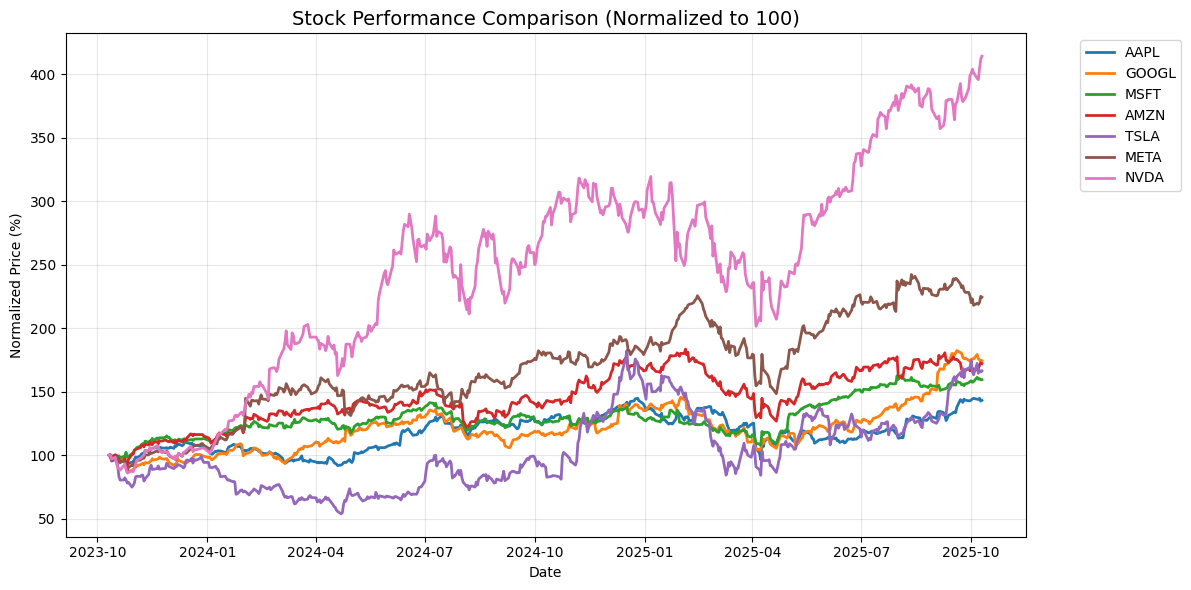

In [ ]:
# Create normalized price comparison chart
plt.figure(figsize=(12, 6))

for symbol, data in stock_data.items():
    normalized_price = (data['Close'] / data['Close'].iloc[0]) * 100
    plt.plot(data.index, normalized_price, label=symbol, linewidth=2)

plt.title('Stock Performance Comparison (Normalized to 100)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Price (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

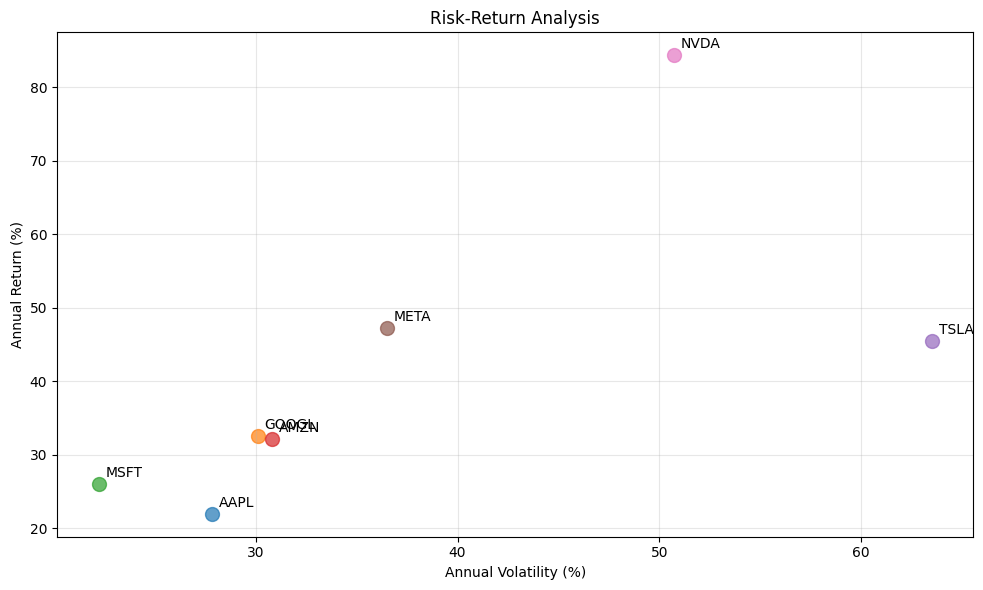

In [ ]:
# Create risk-return scatter plot
plt.figure(figsize=(10, 6))

for symbol in risk_df.index:
    plt.scatter(risk_df.loc[symbol, 'annual_volatility'],
                risk_df.loc[symbol, 'annual_return'],
                s=100, alpha=0.7, label=symbol)

    plt.annotate(symbol,
                (risk_df.loc[symbol, 'annual_volatility'],
                 risk_df.loc[symbol, 'annual_return']),
                xytext=(5, 5), textcoords='offset points')

plt.xlabel('Annual Volatility (%)')
plt.ylabel('Annual Return (%)')
plt.title('Risk-Return Analysis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Generating technical dashboards...
Available columns for AAPL: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL'), ('Symbol', ''), ('Daily_Return', ''), ('Price_Change', ''), ('MA_20', ''), ('MA_50', ''), ('Volatility_20', ''), ('RSI', ''), ('MACD', ''), ('MACD_Signal', ''), ('MACD_Histogram', ''), ('BB_Middle', '')]
❌ Could not plot dashboard for AAPL: only length-1 arrays can be converted to Python scalars
Available columns for GOOGL: [('Close', 'GOOGL'), ('High', 'GOOGL'), ('Low', 'GOOGL'), ('Open', 'GOOGL'), ('Volume', 'GOOGL'), ('Symbol', ''), ('Daily_Return', ''), ('Price_Change', ''), ('MA_20', ''), ('MA_50', ''), ('Volatility_20', '')]
❌ Could not plot dashboard for GOOGL: only length-1 arrays can be converted to Python scalars
Available columns for MSFT: [('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT'), ('Symbol', ''), ('Daily_Return', ''), ('Price_Change', ''), ('MA_20', ''), ('MA_50', ''), ('

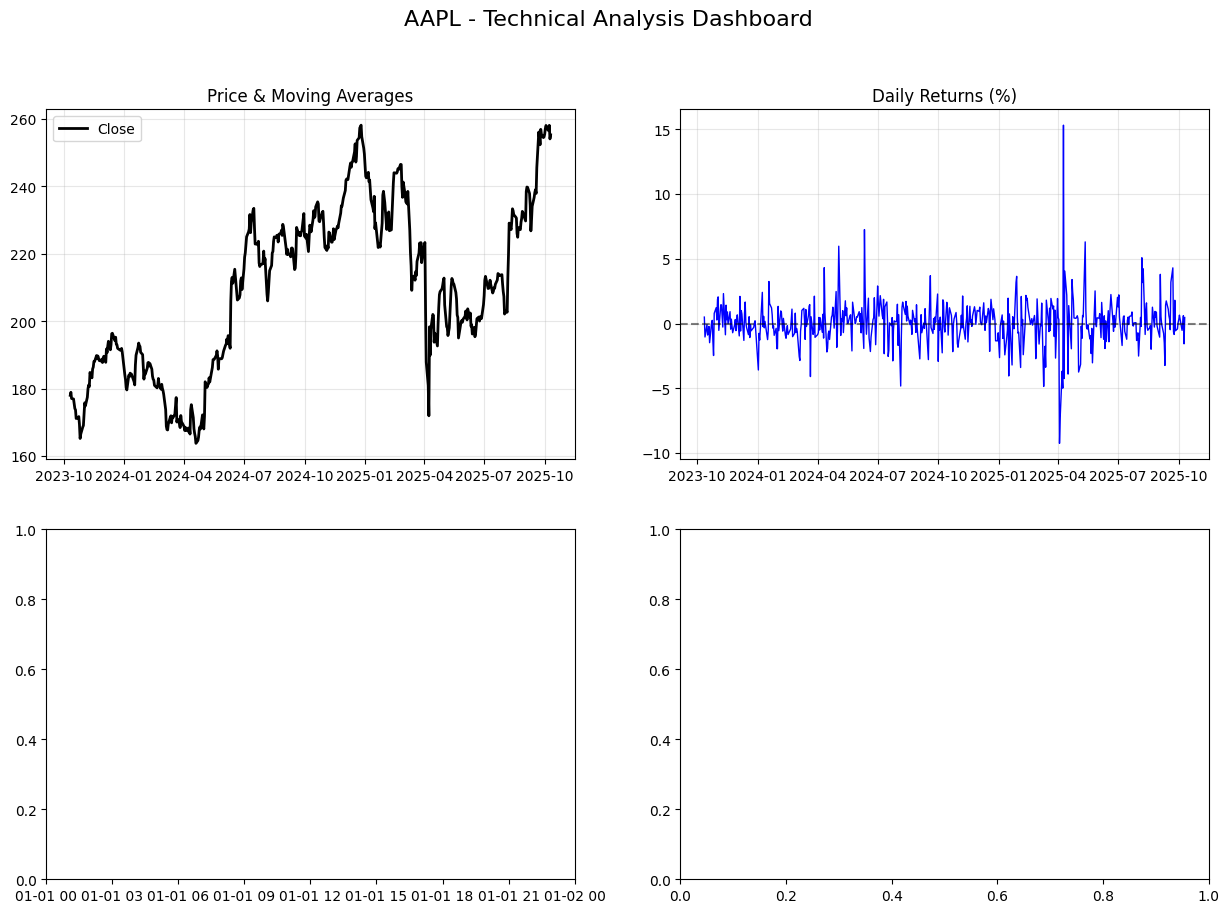

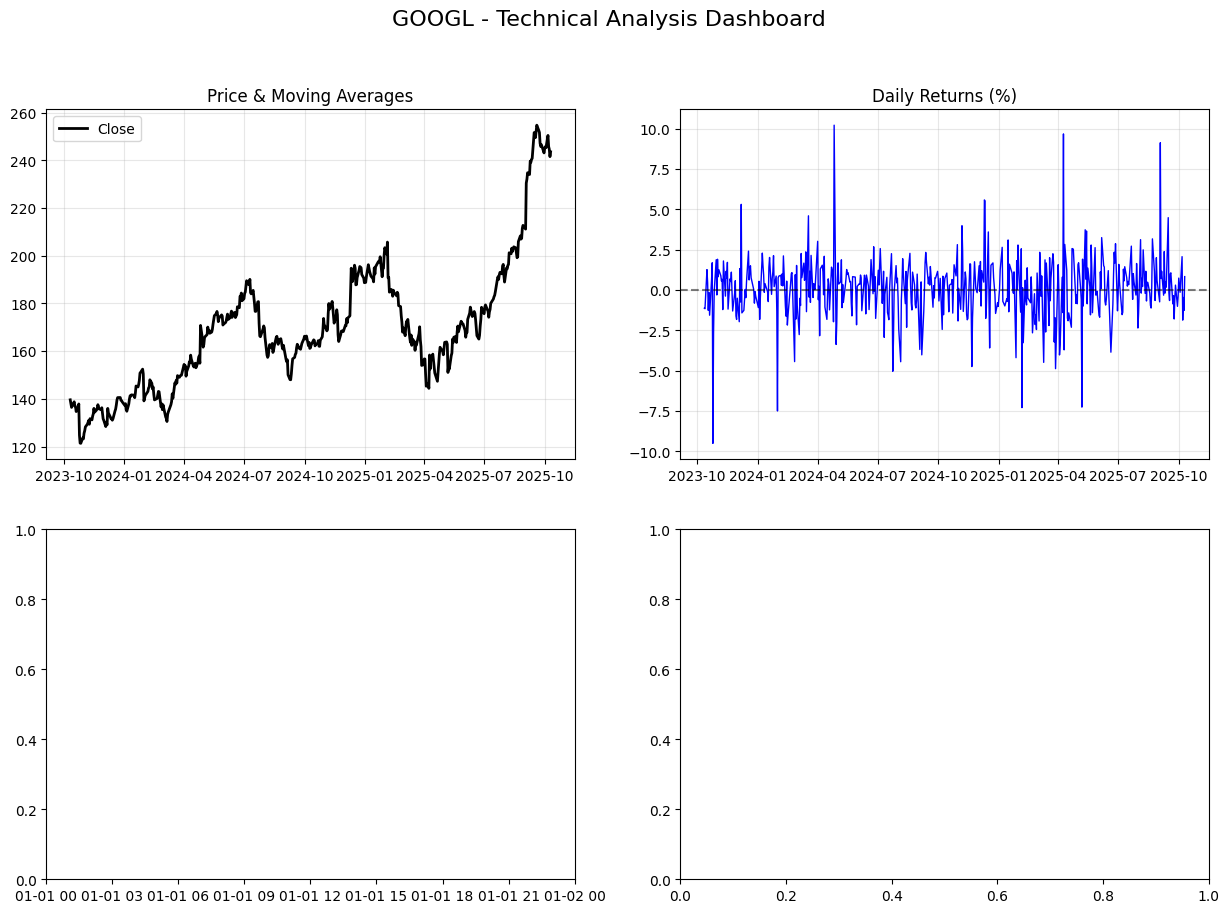

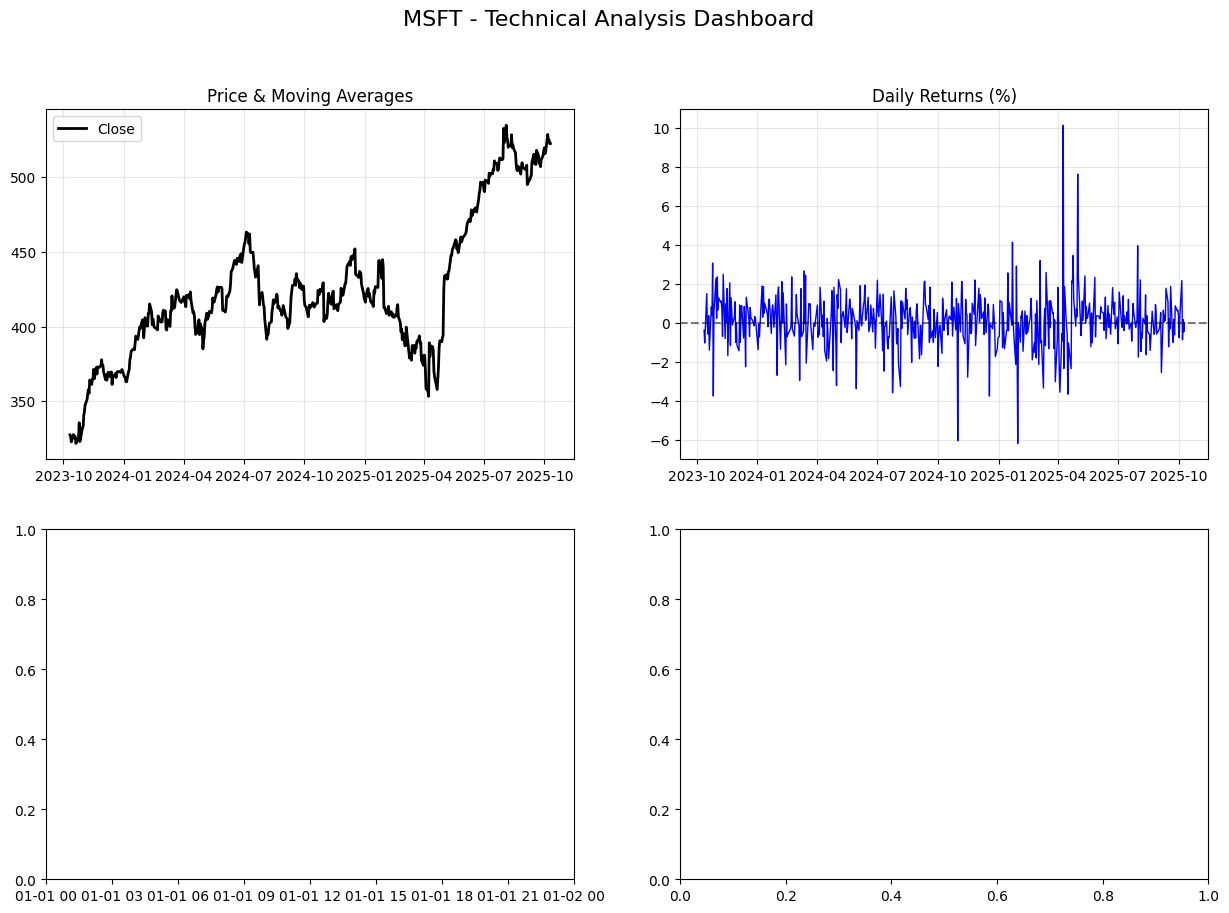

In [ ]:
def plot_technical_dashboard(symbol, data):
    """Plot technical analysis dashboard with error handling"""

    # Check which indicators are available
    available_columns = data.columns.tolist()
    print(f"Available columns for {symbol}: {available_columns}")

    # Create subplots based on available indicators
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{symbol} - Technical Analysis Dashboard', fontsize=16)

    # Plot 1: Price and Moving Averages (should always be available)
    ax1 = axes[0, 0]
    ax1.plot(data.index, data['Close'], label='Close', linewidth=2, color='black')

    # Plot moving averages if available
    if 'MA_20' in available_columns:
        ax1.plot(data.index, data['MA_20'], label='MA 20', alpha=0.7)
    if 'MA_50' in available_columns:
        ax1.plot(data.index, data['MA_50'], label='MA 50', alpha=0.7)

    ax1.set_title('Price & Moving Averages')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: RSI if available
    ax2 = axes[0, 1]
    if 'RSI' in available_columns:
        ax2.plot(data.index, data['RSI'], color='purple', linewidth=2)
        ax2.axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought (70)')
        ax2.axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold (30)')
        ax2.axhline(50, linestyle='--', color='gray', alpha=0.3, label='Neutral (50)')
        ax2.set_title('RSI Indicator')
        ax2.legend()
        ax2.set_ylim(0, 100)
    else:
        # Plot Daily Returns instead
        ax2.plot(data.index, data['Daily_Return'] * 100, color='blue', linewidth=1)
        ax2.set_title('Daily Returns (%)')
        ax2.axhline(0, linestyle='--', color='black', alpha=0.5)

    ax2.grid(True, alpha=0.3)

    # Plot 3: MACD if available, otherwise Volume
    ax3 = axes[1, 0]
    if 'MACD' in available_columns and 'MACD_Signal' in available_columns:
        ax3.plot(data.index, data['MACD'], label='MACD', color='blue')
        ax3.plot(data.index, data['MACD_Signal'], label='Signal', color='red')
        if 'MACD_Histogram' in available_columns:
            ax3.bar(data.index, data['MACD_Histogram'], alpha=0.3, color='gray')
        ax3.set_title('MACD')
        ax3.legend()
    else:
        # Plot Volume instead
        ax3.bar(data.index, data['Volume'], alpha=0.7, color='orange', label='Volume')
        if 'Volume_MA20' in available_columns:
            ax3.plot(data.index, data['Volume_MA20'], color='red', linewidth=2, label='Volume MA20')
        ax3.set_title('Trading Volume')
        ax3.legend()

    ax3.grid(True, alpha=0.3)

    # Plot 4: Bollinger Bands if available, otherwise Volatility
    ax4 = axes[1, 1]
    if all(col in available_columns for col in ['BB_Upper', 'BB_Lower', 'BB_Middle']):
        ax4.plot(data.index, data['Close'], label='Close', color='black', linewidth=1)
        ax4.plot(data.index, data['BB_Upper'], label='Upper Band', color='red', alpha=0.7)
        ax4.plot(data.index, data['BB_Lower'], label='Lower Band', color='green', alpha=0.7)
        ax4.fill_between(data.index, data['BB_Upper'], data['BB_Lower'], alpha=0.1)
        ax4.set_title('Bollinger Bands')
        ax4.legend()
    elif 'Volatility_20' in available_columns:
        # Plot Volatility instead
        ax4.plot(data.index, data['Volatility_20'] * 100, color='red', linewidth=2)
        ax4.set_title('20-Day Volatility (%)')
    else:
        # Plot Price Change
        ax4.plot(data.index, data['Price_Change'], color='green', linewidth=1)
        ax4.axhline(0, linestyle='--', color='black', alpha=0.5)
        ax4.set_title('Daily Price Change')

    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot dashboard for available stocks
print("Generating technical dashboards...")
plotted_count = 0
for symbol in list(stock_data.keys())[:3]:  # Plot first 3 stocks
    try:
        plot_technical_dashboard(symbol, stock_data[symbol])
        plotted_count += 1
    except Exception as e:
        print(f"❌ Could not plot dashboard for {symbol}: {e}")
        continue

print(f"✅ Successfully plotted {plotted_count} technical dashboards")

In [ ]:
print("📈 STOCK ANALYSIS SUMMARY REPORT")
print("=" * 50)

# Top performers by total return
top_return = risk_df.nlargest(3, 'total_return')['total_return']
print(f"\n🏆 Top 3 Performers (Total Return):")
for symbol, ret in top_return.items():
    print(f"  {symbol}: {ret:.1f}%")

# Best risk-adjusted returns
top_sharpe = risk_df.nlargest(3, 'sharpe_ratio')['sharpe_ratio']
print(f"\n🎯 Best Risk-Adjusted Returns (Sharpe Ratio):")
for symbol, sharpe in top_sharpe.items():
    print(f"  {symbol}: {sharpe:.2f}")

# Lowest volatility
low_vol = risk_df.nsmallest(3, 'annual_volatility')['annual_volatility']
print(f"\n🛡️  Lowest Volatility Stocks:")
for symbol, vol in low_vol.items():
    print(f"  {symbol}: {vol:.1f}%")

print(f"\n✅ Analysis completed successfully!")
print(f"📊 Stocks analyzed: {len(stock_data)}")
print(f"📅 Period: {start_date.date()} to {end_date.date()}")

📈 STOCK ANALYSIS SUMMARY REPORT

🏆 Top 3 Performers (Total Return):
  NVDA: 314.0%
  META: 124.5%
  GOOGL: 74.5%

🎯 Best Risk-Adjusted Returns (Sharpe Ratio):
  NVDA: 1.66
  META: 1.29
  MSFT: 1.17

🛡️  Lowest Volatility Stocks:
  MSFT: 22.2%
  AAPL: 27.9%
  GOOGL: 30.1%

✅ Analysis completed successfully!
📊 Stocks analyzed: 7
📅 Period: 2023-10-11 to 2025-10-10


In [ ]:
# Install Streamlit for web app deployment
!pip install streamlit
!pip install pyngrok

print("Streamlit installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.1 MB/s eta 0:00:00
Streamlit installed successfully!


In [ ]:
# Create a complete Streamlit app
streamlit_code = '''
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set page configuration
st.set_page_config(
    page_title="Stock Market Analyzer",
    page_icon="📈",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown("""
<style>
    .main-header {
        font-size: 3rem;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
    }
    .metric-card {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 10px;
        margin: 0.5rem;
    }
</style>
""", unsafe_allow_html=True)

class StockAnalyzer:
    def __init__(self, data):
        self.data = data

    def calculate_risk_metrics(self, prices, returns):
        if len(returns) == 0:
            return {}
        total_return = (prices.iloc[-1] / prices.iloc[0] - 1) * 100
        annual_return = returns.mean() * 252 * 100
        annual_volatility = returns.std() * np.sqrt(252) * 100
        sharpe_ratio = (returns.mean() * 252) / (returns.std() * np.sqrt(252)) if returns.std() > 0 else 0

        cumulative_max = prices.expanding().max()
        drawdown = (prices / cumulative_max - 1) * 100
        max_drawdown = drawdown.min()

        return {
            'total_return': total_return,
            'annual_return': annual_return,
            'annual_volatility': annual_volatility,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown
        }

def main():
    # Header
    st.markdown('<h1 class="main-header">📈 Stock Market Analyzer</h1>', unsafe_allow_html=True)

    # Sidebar for user inputs
    st.sidebar.header("🔧 Configuration")

    # Stock selection
    default_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'META', 'NVDA']
    selected_stocks = st.sidebar.multiselect(
        "Select Stocks:",
        default_stocks,
        default=default_stocks[:3]
    )

    # Date range
    col1, col2 = st.sidebar.columns(2)
    with col1:
        start_date = st.date_input("Start Date", datetime.now() - timedelta(days=365))
    with col2:
        end_date = st.date_input("End Date", datetime.now())

    # Analysis type
    analysis_type = st.sidebar.selectbox(
        "Analysis Type:",
        ["Technical Analysis", "Risk Analysis", "Portfolio Analysis"]
    )

    if not selected_stocks:
        st.warning("⚠️ Please select at least one stock")
        return

    # Fetch and process data
    @st.cache_data
    def load_data(stocks, start_date, end_date):
        stock_data = {}
        for symbol in stocks:
            try:
                data = yf.download(symbol, start=start_date, end=end_date, progress=False)
                if not data.empty:
                    # Basic calculations
                    data['Daily_Return'] = data['Close'].pct_change()
                    data['MA_20'] = data['Close'].rolling(window=20).mean()
                    data['MA_50'] = data['Close'].rolling(window=50).mean()
                    stock_data[symbol] = data
            except:
                continue
        return stock_data

    with st.spinner('Loading stock data...'):
        stock_data = load_data(selected_stocks, start_date, end_date)

    if not stock_data:
        st.error("❌ Failed to load stock data. Please check your selections.")
        return

    # Main content based on analysis type
    if analysis_type == "Technical Analysis":
        show_technical_analysis(stock_data)
    elif analysis_type == "Risk Analysis":
        show_risk_analysis(stock_data)
    else:
        show_portfolio_analysis(stock_data)

def show_technical_analysis(stock_data):
    st.header("📊 Technical Analysis")

    # Stock selector for detailed view
    selected_stock = st.selectbox("Select stock for detailed analysis:", list(stock_data.keys()))

    if selected_stock:
        data = stock_data[selected_stock]

        # Price chart
        st.subheader(f"Price Chart - {selected_stock}")
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.plot(data.index, data['Close'], label='Close Price', linewidth=2)
        ax.plot(data.index, data['MA_20'], label='20-day MA', alpha=0.7)
        ax.plot(data.index, data['MA_50'], label='50-day MA', alpha=0.7)
        ax.set_title(f'{selected_stock} - Price and Moving Averages')
        ax.legend()
        ax.grid(True, alpha=0.3)
        st.pyplot(fig)

        # Metrics
        col1, col2, col3, col4 = st.columns(4)
        current_price = data['Close'].iloc[-1]
        price_change = data['Close'].iloc[-1] - data['Close'].iloc[-2]
        price_change_pct = (price_change / data['Close'].iloc[-2]) * 100

        with col1:
            st.metric("Current Price", f"${current_price:.2f}")
        with col2:
            st.metric("Daily Change", f"${price_change:.2f}", f"{price_change_pct:.2f}%")
        with col3:
            st.metric("20-day MA", f"${data['MA_20'].iloc[-1]:.2f}")
        with col4:
            st.metric("50-day MA", f"${data['MA_50'].iloc[-1]:.2f}")

def show_risk_analysis(stock_data):
    st.header("⚡ Risk Analysis")

    # Calculate risk metrics
    risk_metrics = {}
    analyzer = StockAnalyzer(None)

    for symbol, data in stock_data.items():
        returns = data['Daily_Return'].dropna()
        if len(returns) > 0:
            metrics = analyzer.calculate_risk_metrics(data['Close'], returns)
            risk_metrics[symbol] = metrics

    if risk_metrics:
        risk_df = pd.DataFrame(risk_metrics).T

        # Display metrics in cards
        st.subheader("Risk Metrics")
        cols = st.columns(len(risk_metrics))

        for idx, (symbol, metrics) in enumerate(risk_metrics.items()):
            with cols[idx]:
                st.markdown(f'<div class="metric-card">', unsafe_allow_html=True)
                st.metric("Stock", symbol)
                st.metric("Total Return", f"{metrics['total_return']:.1f}%")
                st.metric("Volatility", f"{metrics['annual_volatility']:.1f}%")
                st.metric("Sharpe Ratio", f"{metrics['sharpe_ratio']:.2f}")
                st.markdown('</div>', unsafe_allow_html=True)

        # Risk-Return scatter plot
        st.subheader("Risk-Return Analysis")
        fig, ax = plt.subplots(figsize=(10, 6))

        for symbol in risk_df.index:
            ax.scatter(risk_df.loc[symbol, 'annual_volatility'],
                      risk_df.loc[symbol, 'annual_return'],
                      s=100, label=symbol)
            ax.annotate(symbol,
                       (risk_df.loc[symbol, 'annual_volatility'],
                        risk_df.loc[symbol, 'annual_return']),
                       xytext=(5, 5), textcoords='offset points')

        ax.set_xlabel('Annual Volatility (%)')
        ax.set_ylabel('Annual Return (%)')
        ax.set_title('Risk-Return Scatter Plot')
        ax.legend()
        ax.grid(True, alpha=0.3)
        st.pyplot(fig)

def show_portfolio_analysis(stock_data):
    st.header("💼 Portfolio Analysis")

    # Portfolio weights
    st.subheader("Portfolio Allocation")
    stocks = list(stock_data.keys())
    weights = {}

    cols = st.columns(len(stocks))
    for idx, stock in enumerate(stocks):
        with cols[idx]:
            weight = st.slider(f"{stock} Weight", 0, 100, 100//len(stocks), key=stock)
            weights[stock] = weight / 100.0

    # Normalize weights
    total_weight = sum(weights.values())
    if total_weight > 0:
        for stock in weights:
            weights[stock] /= total_weight

    # Display portfolio allocation
    st.subheader("Portfolio Allocation Chart")
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(weights.values(), labels=weights.keys(), autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    st.pyplot(fig)

    # Calculate portfolio metrics
    st.subheader("Portfolio Performance")
    returns_data = pd.DataFrame()
    for symbol, data in stock_data.items():
        returns_data[symbol] = data['Daily_Return']

    returns_data = returns_data.dropna()

    if len(returns_data) > 0:
        # Equal weight portfolio for demo
        equal_weights = np.array([1/len(stocks)] * len(stocks))
        portfolio_returns = returns_data.mean() * 252
        portfolio_cov = returns_data.cov() * 252

        portfolio_return = np.sum(equal_weights * portfolio_returns) * 100
        portfolio_volatility = np.sqrt(np.dot(equal_weights.T, np.dot(portfolio_cov, equal_weights))) * 100

        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Portfolio Return", f"{portfolio_return:.1f}%")
        with col2:
            st.metric("Portfolio Volatility", f"{portfolio_volatility:.1f}%")
        with col3:
            sharpe = portfolio_return / portfolio_volatility if portfolio_volatility > 0 else 0
            st.metric("Sharpe Ratio", f"{sharpe:.2f}")

if __name__ == "__main__":
    main()
'''

# Write the Streamlit app to a file
with open('stock_analyzer.py', 'w') as f:
    f.write(streamlit_code)

print("✅ Streamlit app created: 'stock_analyzer.py'")

✅ Streamlit app created: 'stock_analyzer.py'


In [ ]:
# Method 1: Run Streamlit locally (for development)
print("""
🚀 TO RUN THE STREAMLIT APP:

Option 1: Local Development
----------------------------
!streamlit run stock_analyzer.py

Option 2: Deploy with ngrok (public URL)
-----------------------------------------
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"Public URL: {public_url}")

Option 3: Deploy to Streamlit Sharing (Free)
--------------------------------------------
1. Push your code to GitHub
2. Go to share.streamlit.io
3. Connect your repository
4. Deploy!

Option 4: Deploy to Hugging Face Spaces (Free)
----------------------------------------------
1. Create account at huggingface.co
2. Create new Space
3. Upload your stock_analyzer.py file
4. Add requirements.txt with dependencies
""")

# Create requirements.txt
requirements = '''
streamlit
yfinance
pandas
numpy
matplotlib
seaborn
plotly
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ requirements.txt created")


🚀 TO RUN THE STREAMLIT APP:

Option 1: Local Development
----------------------------
!streamlit run stock_analyzer.py

Option 2: Deploy with ngrok (public URL)
-----------------------------------------
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f"Public URL: {public_url}")

Option 3: Deploy to Streamlit Sharing (Free)
--------------------------------------------
1. Push your code to GitHub
2. Go to share.streamlit.io
3. Connect your repository
4. Deploy!

Option 4: Deploy to Hugging Face Spaces (Free)
----------------------------------------------
1. Create account at huggingface.co
2. Create new Space
3. Upload your stock_analyzer.py file
4. Add requirements.txt with dependencies

✅ requirements.txt created


In [ ]:
# Test run the Streamlit app (in background)
import subprocess
import threading
import time

def run_streamlit():
    try:
        # This will run in the background
        subprocess.run(['streamlit', 'run', 'stock_analyzer.py', '--server.port', '8501'],
                      capture_output=True, text=True)
    except Exception as e:
        print(f"Streamlit error: {e}")

print("Starting Streamlit app in background...")
# Note: In Colab, we can't directly run Streamlit, but this shows how it would work locally

print("""
📋 NEXT STEPS FOR DEPLOYMENT:

1. DOWNLOAD YOUR FILES:
   - Download 'stock_analyzer.py'
   - Download 'requirements.txt'

2. LOCAL DEPLOYMENT:
   - Install: pip install -r requirements.txt
   - Run: streamlit run stock_analyzer.py

3. CLOUD DEPLOYMENT (Recommended):
   - Push both files to GitHub
   - Deploy on Streamlit Sharing (share.streamlit.io)
   - OR Deploy on Hugging Face Spaces

4. FEATURES OF YOUR APP:
   ✅ Multi-stock selection
   ✅ Technical analysis charts
   ✅ Risk metrics calculation
   ✅ Portfolio allocation
   ✅ Interactive sliders and filters
   ✅ Professional UI with metrics cards
""")

Starting Streamlit app in background...

📋 NEXT STEPS FOR DEPLOYMENT:

1. DOWNLOAD YOUR FILES:
   - Download 'stock_analyzer.py'
   - Download 'requirements.txt'

2. LOCAL DEPLOYMENT:
   - Install: pip install -r requirements.txt
   - Run: streamlit run stock_analyzer.py

3. CLOUD DEPLOYMENT (Recommended):
   - Push both files to GitHub
   - Deploy on Streamlit Sharing (share.streamlit.io)
   - OR Deploy on Hugging Face Spaces

4. FEATURES OF YOUR APP:
   ✅ Multi-stock selection
   ✅ Technical analysis charts
   ✅ Risk metrics calculation
   ✅ Portfolio allocation
   ✅ Interactive sliders and filters
   ✅ Professional UI with metrics cards



In [ ]:
from google.colab import files
files.download('stock_analyzer.py')


FileNotFoundError: Cannot find file: stock_analyzer.py

In [ ]:
!ls -l


total 4
drwxr-xr-x 1 root root 4096 Oct 22 13:39 sample_data


In [3]:
%%writefile stock_analyzer.py
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go

st.set_page_config(page_title="📈 Stock Analyzer", layout="wide")

st.title("📊 Stock Analyzer Dashboard")

# Sidebar inputs
st.sidebar.header("Stock Selection")
stocks = st.sidebar.multiselect("Select Stocks", ["AAPL", "GOOGL", "MSFT", "TSLA", "AMZN"], default=["AAPL"])
start_date = st.sidebar.date_input("Start Date", pd.to_datetime("2023-01-01"))
end_date = st.sidebar.date_input("End Date", pd.to_datetime("today"))

# Fetch data
data = yf.download(stocks, start=start_date, end=end_date)["Adj Close"]

# Main chart
st.subheader("📉 Price Trend")
fig = go.Figure()
for stock in stocks:
    fig.add_trace(go.Scatter(x=data.index, y=data[stock], mode="lines", name=stock))
fig.update_layout(title="Stock Price Over Time", xaxis_title="Date", yaxis_title="Price (USD)")
st.plotly_chart(fig, use_container_width=True)

# Metrics section
st.subheader("📊 Key Statistics")
returns = data.pct_change().dropna()
avg_return = returns.mean() * 252
volatility = returns.std() * np.sqrt(252)
for stock in stocks:
    st.metric(label=f"{stock} Annual Return", value=f"{avg_return[stock]*100:.2f}%")
    st.metric(label=f"{stock} Volatility", value=f"{volatility[stock]*100:.2f}%")

# Portfolio allocation
st.subheader("💰 Portfolio Simulation")
weights = np.array([1/len(stocks)] * len(stocks))
portfolio_return = np.sum(avg_return * weights)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
st.write(f"**Expected Portfolio Return:** {portfolio_return*100:.2f}%")
st.write(f"**Expected Portfolio Volatility:** {portfolio_volatility*100:.2f}%")

st.success("✅ Analysis Complete")


Writing stock_analyzer.py


In [4]:
!ls -l


total 8
drwxr-xr-x 1 root root 4096 Oct 22 13:39 sample_data
-rw-r--r-- 1 root root 1741 Oct 24 09:14 stock_analyzer.py


In [5]:
from google.colab import files
files.download('stock_analyzer.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!pip install streamlit pyngrok --quiet


In [11]:
!ngrok config add-authtoken 2yxKhHSn3epikEjflJkZ6RhHJSr_4Q1oLJ3qHxTznURsoRdPQ



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [12]:
from pyngrok import ngrok
import threading
import time
import subprocess

# Kill any previous tunnels
ngrok.kill()

# Start Streamlit in the background
def run_app():
    subprocess.run(["streamlit", "run", "stock_analyzer.py", "--server.port", "8501"])

thread = threading.Thread(target=run_app)
thread.start()

# Wait a bit for the server to start
time.sleep(5)

# Create the tunnel again
public_url = ngrok.connect(8501)
print(f"🔗 Streamlit App URL: {public_url}")


🔗 Streamlit App URL: NgrokTunnel: "https://c217ba6b8421.ngrok-free.app" -> "http://localhost:8501"


In [14]:
import yfinance as yf
import pandas as pd
import streamlit as st


In [16]:
%%writefile stock_analyzer.py
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go

st.set_page_config(page_title="📈 Stock Analyzer", layout="wide")

st.title("📊 Stock Analyzer Dashboard")

# Sidebar inputs
st.sidebar.header("Stock Selection")
stocks = st.sidebar.multiselect("Select Stocks", ["AAPL", "GOOGL", "MSFT", "TSLA", "AMZN"], default=["AAPL"])
start_date = st.sidebar.date_input("Start Date", pd.to_datetime("2023-01-01"))
end_date = st.sidebar.date_input("End Date", pd.to_datetime("today"))

# --- FIX for KeyError: 'Adj Close' ---
raw_data = yf.download(stocks, start=start_date, end=end_date)

if isinstance(raw_data.columns, pd.MultiIndex):
    if "Adj Close" in raw_data.columns.levels[0]:
        data = raw_data["Adj Close"]
    elif "Close" in raw_data.columns.levels[0]:
        st.warning("⚠️ 'Adj Close' not found — using 'Close' instead.")
        data = raw_data["Close"]
    else:
        st.error("❌ No valid price data found.")
        st.stop()
else:
    if "Adj Close" in raw_data.columns:
        data = raw_data[["Adj Close"]]
    elif "Close" in raw_data.columns:
        st.warning("⚠️ 'Adj Close' not found — using 'Close' instead.")
        data = raw_data[["Close"]]
    else:
        st.error("❌ No valid price data found.")
        st.stop()

if data.empty:
    st.error("❌ No data retrieved. Try different stocks or dates.")
    st.stop()

# Main chart
st.subheader("📉 Price Trend")
fig = go.Figure()
for stock in stocks:
    fig.add_trace(go.Scatter(x=data.index, y=data[stock], mode="lines", name=stock))
fig.update_layout(title="Stock Price Over Time", xaxis_title="Date", yaxis_title="Price (USD)")
st.plotly_chart(fig, use_container_width=True)

# Metrics section
st.subheader("📊 Key Statistics")
returns = data.pct_change().dropna()
avg_return = returns.mean() * 252
volatility = returns.std() * np.sqrt(252)
for stock in stocks:
    st.metric(label=f"{stock} Annual Return", value=f"{avg_return[stock]*100:.2f}%")
    st.metric(label=f"{stock} Volatility", value=f"{volatility[stock]*100:.2f}%")

# Portfolio allocation
st.subheader("💰 Portfolio Simulation")
weights = np.array([1/len(stocks)] * len(stocks))
portfolio_return = np.sum(avg_return * weights)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
st.write(f"**Expected Portfolio Return:** {portfolio_return*100:.2f}%")
st.write(f"**Expected Portfolio Volatility:** {portfolio_volatility*100:.2f}%")

st.success("✅ Analysis Complete")


Overwriting stock_analyzer.py


In [18]:
from pyngrok import ngrok
import threading, time, subprocess

ngrok.kill()

def run_app():
    subprocess.run(["streamlit", "run", "stock_analyzer.py", "--server.port", "8501"])

thread = threading.Thread(target=run_app)
thread.start()

time.sleep(5)
public_url = ngrok.connect(8501)
print(f"🔗 Streamlit App URL: {public_url}")


🔗 Streamlit App URL: NgrokTunnel: "https://a4199e283394.ngrok-free.app" -> "http://localhost:8501"
